Saving 14176.jpg to 14176 (1).jpg


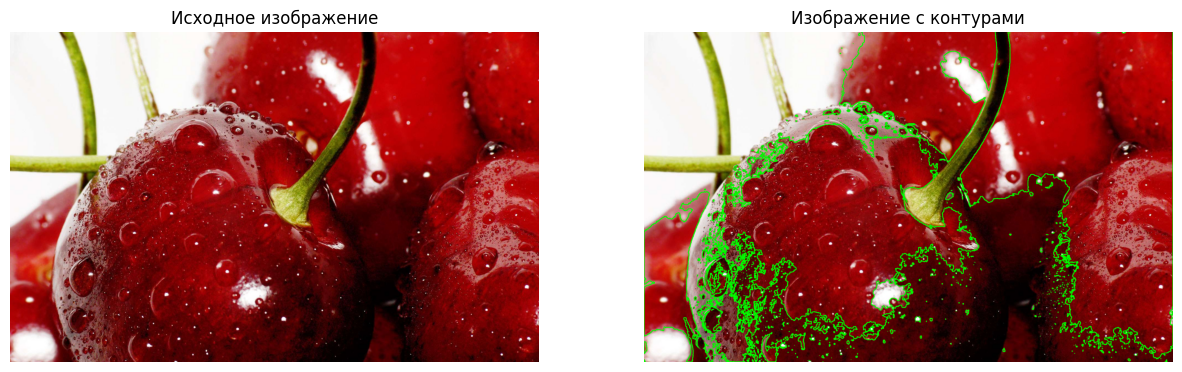

In [5]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Загрузка изображения с компьютера
uploaded = files.upload()
image_path = next(iter(uploaded))

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Функция отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(15, 10))
    cols = len(images) if len(images) <= 3 else 3
    for i in range(len(images)):
        plt.subplot((len(images) + cols - 1) // cols , cols, i + 1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


# Преобразование BGR в HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Определение диапазона красного цвета
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Объединение масок
mask = mask1 | mask2

# Нахождение контуров
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Рисование контуров на изображении
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Отображение результата
titles = ['Исходное изображение', 'Изображение с контурами']
images = [image_rgb, cv2.cvtColor(image, cv2.COLOR_BGR2RGB)] # Конвертация обратно в RGB для отображения

show_images(titles, images)